In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\College\Deep Learning\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\train'
validation_dir = r'C:\College\Deep Learning\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\Valid'
test_dir = r'C:\College\Deep Learning\Osteoarthritis_Assignment_dataset\Osteoarthritis_Assignment_dataset\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [17]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights = 'imagenet',
                       include_top=False,
                       input_shape=(150,150,3))

87916544/87910968 [==============================] - 13s 0us/step


In [18]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [23]:
conv_base.trainable = False

In [29]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
            optimizer = optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [31]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=110,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 30)

Epoch 1/20
110/110 [==============================] - 100s 913ms/step - loss: 0.3511 - acc: 0.8370 - val_loss: 0.2568 - val_acc: 0.9000
Epoch 2/20
110/110 [==============================] - 88s 803ms/step - loss: 0.2817 - acc: 0.8717 - val_loss: 0.2211 - val_acc: 0.9117
Epoch 3/20
110/110 [==============================] - 88s 801ms/step - loss: 0.2404 - acc: 0.8963 - val_loss: 0.3825 - val_acc: 0.8350
Epoch 4/20
110/110 [==============================] - 89s 806ms/step - loss: 0.1883 - acc: 0.9279 - val_loss: 0.2467 - val_acc: 0.9100
Epoch 5/20
110/110 [==============================] - 88s 797ms/step - loss: 0.1631 - acc: 0.9443 - val_loss: 0.1879 - val_acc: 0.9283
Epoch 6/20
110/110 [==============================] - 88s 797ms/step - loss: 0.1407 - acc: 0.9543 - val_loss: 0.2064 - val_acc: 0.9233
Epoch 7/20
110/110 [==============================] - 98s 889ms/step - loss: 0.1242 - acc: 0.9571 - val_loss: 0.2204 - val_acc: 0.9150
Epoch 8/20
110/110 [==============================] - 

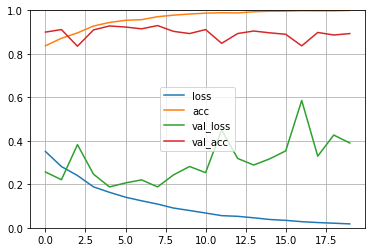

In [32]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()